# ArXiv Topic Modeling #

### Table of Contents ###
1. Overview<br/>
2. Importing Modules and Reading the Dataset<br/>
3. Data Cleaning and Exploration<br/>
4. Text Preprocessing - Tokenization and Parsing<br/>
5. Topic Modeling<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Topic Modeling Using Just Nouns<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Latent Semantic Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Latent Dirichlet Allocation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. Non-Negative Matrix Factorization<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Topic Modeling Using Nouns + Adjectives<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Latent Semantic Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Latent Dirichlet Allocation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. Non-Negative Matrix Factorization<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Topic Modeling Using Nouns + Adjectives + Proper Nouns<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. Latent Semantic Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Latent Dirichlet Allocation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. Non-Negative Matrix Factorization<br/>
6. Conclusion<br/>
7. Next Steps

### Overview ###

ArXiv is a repository consisting of over 1.5 million scientific papers in fields such as mathematics, computer science, and physics. It is owned and operated by Cornell University.

This capstone will explore the use of different topic modeling methods to predict the topics of each paper. I will be attempting to use Latent Semantic Analysis, Latent Dirichlet Allocation, and Non-Negative Matrix Factorization.

<a name="importing-modules-and-reading-the-dataset"></a>
### Importing Modules and Reading the Dataset ###

In [1]:
import pandas as pd
import numpy as np
import arxiv
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("en_core_web_md")

In [2]:
result = arxiv.query("math",max_results=100000)
math = pd.DataFrame(result)

result = arxiv.query("cs",max_results=100000)
cs = pd.DataFrame(result)

result = arxiv.query("physics",max_results=100000)
physics = pd.DataFrame(result)

There are many different topics discussed in the arXiv scientific papers. I will be focusing solely on the mathematics, computer science, and physics papers. As such I have imported 100,000 papers from each query and will be resampling later on as necessary to ensure I have an equal number of each.

In [3]:
print(math.shape)
print(cs.shape)
print(physics.shape)

(7000, 22)
(4102, 22)
(2000, 22)


In [4]:
math['query'] = 'math'
cs['query'] = 'cs'
physics['query'] = 'physics'

In [5]:
math['length'] = math['summary'].apply(len)
cs['length'] = cs['summary'].apply(len)
physics['length'] = physics['summary'].apply(len)

In [6]:
df = pd.concat([math, cs, physics])

In [7]:
df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed,query,length
0,None,The 4 page short notes consists of comments on...,"{'term': 'physics.flu-dyn', 'scheme': 'http://...",http://arxiv.org/abs/1807.00200v1,Jiten C Kalita,{'name': 'Jiten C Kalita'},[Jiten C Kalita],None,True,http://arxiv.org/abs/1807.00200v1,...,"(2018, 6, 30, 16, 43, 48, 5, 181, 0)",In this short note we provide clarification to...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'physics.flu-dyn', 'scheme': 'http:/...","Comments on ""Comment on ""Finiteness of corner ...","{'type': 'text/plain', 'language': None, 'base...",2018-06-30T16:43:48Z,"(2018, 6, 30, 16, 43, 48, 5, 181, 0)",math,185
1,None,None,"{'term': 'cs.IR', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1405.3353v1,Akiko Aizawa,{'name': 'Akiko Aizawa'},"[Minh-Quoc Nghiem, Giovanni Yoko Kristianto, G...",None,True,http://arxiv.org/abs/1405.3353v1,...,"(2014, 5, 14, 3, 44, 32, 2, 134, 0)",Mathematical content is a valuable information...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.IR', 'scheme': 'http://arxiv.org...",Which one is better: presentation-based or con...,"{'type': 'text/plain', 'language': None, 'base...",2014-05-14T03:44:32Z,"(2014, 5, 14, 3, 44, 32, 2, 134, 0)",math,603
2,None,LaTeX; to appear in J. Ramanujan Math. Soc,"{'term': 'math.NT', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math/0110071v1,Chandrashekhar Khare,{'name': 'Chandrashekhar Khare'},"[Kirti Joshi, Chandrashekhar Khare]",None,True,http://arxiv.org/abs/math/0110071v1,...,"(2001, 10, 5, 20, 55, 39, 4, 278, 0)",This is a revised version of the preprint whic...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.NT', 'scheme': 'http://arxiv.o...",On ordinary forms and ordinary Galois represen...,"{'type': 'text/plain', 'language': None, 'base...",2001-10-05T20:55:39Z,"(2001, 10, 5, 20, 55, 39, 4, 278, 0)",math,147
3,None,2 pages,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math-ph/0301030v1,Ali Mostafazadeh,{'name': 'Ali Mostafazadeh'},[Ali Mostafazadeh],10.1063/1.1540714,True,http://arxiv.org/abs/math-ph/0301030v1,...,"(2003, 1, 22, 8, 14, 23, 2, 22, 0)","An error in the paper [J. Math. Phys. 43, 6343...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math-ph', 'scheme': 'http://arxiv.o...",Erratum: Pseudo-Hermiticity for a class of non...,"{'type': 'text/plain', 'language': None, 'base...",2003-01-22T08:14:23Z,"(2003, 1, 22, 8, 14, 23, 2, 22, 0)",math,115
4,"University of Murcia, Spain","Latex, 1 page. Erratum to J. Math. Phys. 36, 3...","{'term': 'math-ph', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/math-ph/0308001v1,J. Guerrero,{'name': 'J. Guerrero'},"[V. Aldaya, J. Guerrero]",10.1063/1.1615698,True,http://arxiv.org/abs/math-ph/0308001v1,...,"(2003, 8, 1, 17, 39, 26, 4, 213, 0)",The expression for $\hat{\kappa}$ in J. Math. ...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math-ph', 'scheme': 'http://arxiv.o...",Erratum to: Canonical coherent states for the ...,"{'type': 'text/plain', 'language': None, 'base...",2003-08-01T17:39:26Z,"(2003, 8, 1, 17, 39, 26, 4, 213, 0)",math,116


In [8]:
df.shape

(13102, 24)

<a name="data-cleaning-and-exploration"></a>
### Data Cleaning and Exploration ###

In [9]:
df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed', 'query', 'length'],
      dtype='object')

As seen above, there are many features in this dataset. To predict the topic, I will only be using the text in the summary and title. All of the other features will not be beneficial to the topic models. Below, I have added a feature "text" that is the concatenation of the summary and title. And I have dropped all of the other features.

In [10]:
df['text'] = df['summary'] + " " + df['title']
df = df.drop(columns=['affiliation','arxiv_comment','arxiv_url',
                     'author_detail','doi','guidislink','id',
                     'pdf_url','links','published','summary_detail',
                     'title_detail','updated','updated_parsed',
                     'journal_reference','tags','author','authors',
                     'published_parsed','summary','title'])

In [11]:
df.head()

,arxiv_primary_category,query,length,text
0,"{'term': 'physics.flu-dyn', 'scheme': 'http://...",math,185,In this short note we provide clarification to...
1,"{'term': 'cs.IR', 'scheme': 'http://arxiv.org/...",math,603,Mathematical content is a valuable information...
2,"{'term': 'math.NT', 'scheme': 'http://arxiv.or...",math,147,This is a revised version of the preprint whic...
3,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...",math,115,"An error in the paper [J. Math. Phys. 43, 6343..."
4,"{'term': 'math-ph', 'scheme': 'http://arxiv.or...",math,116,The expression for $\hat{\kappa}$ in J. Math. ...


I will be utilizing the "arxiv_primary_category" feature as a way to compare topics within each of the mathematics, computer science, and physics papers. However the dataset's version of the feature is too complex. Below, I strip down each primary category.

In [12]:
df['arxiv_primary_category'] = df['arxiv_primary_category'].astype(str).str.replace('{\'term\': \'','').str.replace(r'\.(.*)','').str.replace(r'\',(.*)','')

In [13]:
df['arxiv_primary_category'].unique()

array(['physics', 'cs', 'math', 'math-ph', 'nlin', 'q-alg', 'solv-int',
       'hep-th', 'alg-geom', 'cond-mat', 'gr-qc', 'quant-ph', 'dg-ga',
       'hep-ph', 'funct-an', 'astro-ph', 'chao-dyn', 'hep-lat', 'q-bio',
       'q-fin', 'stat', 'nucl-th', 'nucl-ex', 'eess', 'hep-ex', 'econ',
       'cmp-lg', 'adap-org', 'atom-ph'], dtype=object)

With the categories stripped down there are much more categories listed beyond mathematics, computer science, and physics. Below I will be resampling to ensure I only have 1000 of each.

In [14]:
df['arxiv_primary_category'].value_counts()

math        5344
physics     1040
cs           960
astro-ph     932
hep-th       915
math-ph      909
cond-mat     684
hep-ph       614
quant-ph     591
gr-qc        234
hep-ex       180
nlin         153
hep-lat      120
nucl-th       83
eess          54
stat          51
q-alg         42
nucl-ex       36
solv-int      32
alg-geom      27
q-bio         25
dg-ga         23
cmp-lg        21
funct-an      19
chao-dyn       6
atom-ph        2
q-fin          2
econ           2
adap-org       1
Name: arxiv_primary_category, dtype: int64

In [110]:
df_math = df.loc[df['arxiv_primary_category'] == 'math']
df_cs = df.loc[df['arxiv_primary_category'] == 'cs']
df_physics = df.loc[df['arxiv_primary_category'] == 'physics']

In [111]:
from sklearn.utils import resample

df_math = resample(df_math, replace=False, n_samples=1000, random_state=123)
df_cs = resample(df_cs, replace=True, n_samples=1000, random_state=123)
df_physics = resample(df_physics, replace=True, n_samples=1000, random_state=123)

df2 = pd.concat([df_math, df_cs, df_physics])
df2.reset_index(inplace=True)

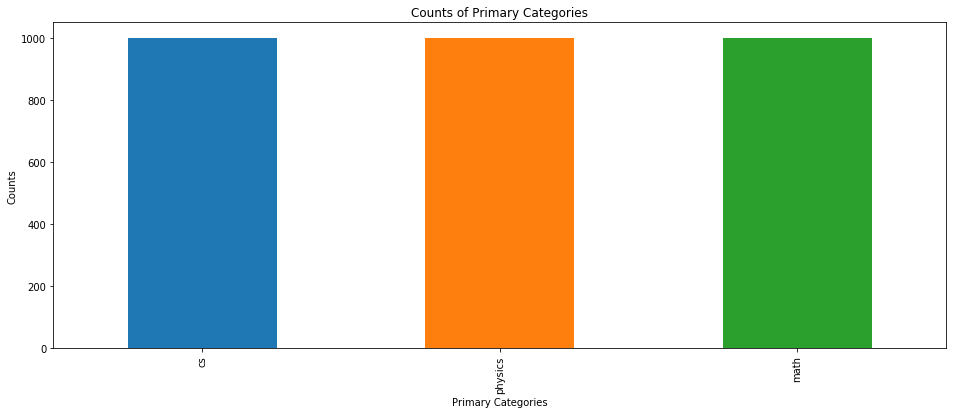

In [112]:
ax = df2['arxiv_primary_category'].value_counts().plot(kind='bar',title='Counts of Primary Categories')
ax.set_ylabel('Counts')
ax.set_xlabel('Primary Categories');

Now my new dataframe only consists of 1000 papers of each mathematics, computer science, and physics.

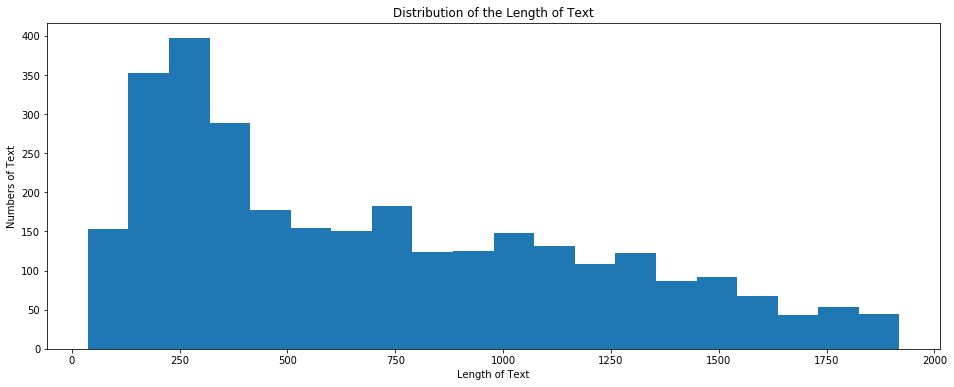

In [113]:
plt.hist(df2['length'],bins=20)
plt.title('Distribution of the Length of Text')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text');

Above is a distribution of the length of each text. The distribution is very skewed to the right. This may become problematic as this suggests the majority of the texts are not very long. Now I'll look at the length of text within each category to see if that may affect the topic models.

In [114]:
math = df2[df2['arxiv_primary_category'] == 'math']
cs = df2[df2['arxiv_primary_category'] == 'cs']
physics = df2[df2['arxiv_primary_category'] == 'physics']

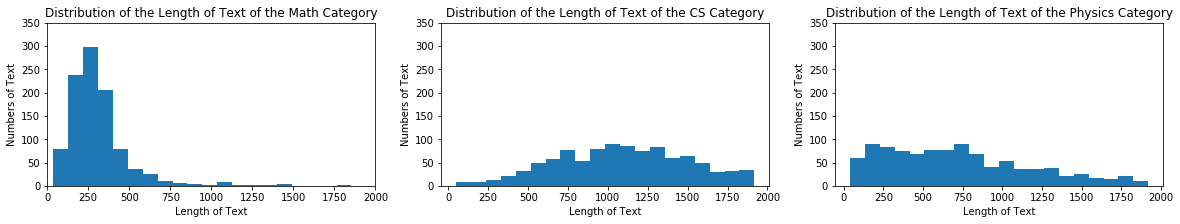

In [115]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
plt.hist(math['length'],bins=20)
plt.title('Distribution of the Length of Text of the Math Category')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text')
plt.ylim(0,350)
plt.xlim(0,2000)

plt.subplot(1,3,2)
plt.hist(cs['length'],bins=20)
plt.title('Distribution of the Length of Text of the CS Category')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text')
plt.ylim(0,350)

plt.subplot(1,3,3)
plt.hist(physics['length'],bins=20)
plt.title('Distribution of the Length of Text of the Physics Category')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text')
plt.ylim(0,350);

As seen above, the math papers seem to be causing most of the skew in the previous distribution. The math papers appear to be much shorter than the computer science and physics papers. The computer science and physics papers have more closely uniformed distributions which means there is a range of text lengths and having a good number of longer texts can help the topic models. With that being said, the topic models might focus more on the computer science and physics topics. The math papers may have a harder time being defined.

<a name="text-preprocessing"></a>
### Text Preprocessing - Tokenization and Parsing ###

In [116]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df2['text'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df2['tokens'] = tokens
df2['lemma'] = lemma
df2['pos'] = pos

Here I am tokenizing and parsing the text in the "text" feature. This is adding 3 new columns of the tokens, lemmas, and parts of speech for each title and summary.

In [117]:
df2.isnull().sum()

index                     0
arxiv_primary_category    0
query                     0
length                    0
text                      0
tokens                    0
lemma                     0
pos                       0
dtype: int64

In [118]:
df2.dtypes

index                      int64
arxiv_primary_category    object
query                     object
length                     int64
text                      object
tokens                    object
lemma                     object
pos                       object
dtype: object

## Topic Modeling ##

As previously stated, this dataset will be used on 3 different types of topic modeling methods. I will also be testing each model on different groups of words. First with just the nouns, then with the nouns and adjectives, and lastly with the nouns, adjectives, and proper nouns to see which groups of words help the topic models.

In [25]:
df2.head()

,index,arxiv_primary_category,query,length,text,tokens,lemma,pos,text_parsed
0,6000,math,math,301,Symmetry analysis of Ermakov systems has attra...,"[Symmetry, analysis, of, Ermakov, systems, has...","[symmetry, analysis, of, Ermakov, system, have...","[NOUN, NOUN, ADP, PROPN, NOUN, VERB, VERB, ADJ...","[-0.083644085, 0.15817751, -0.16890123, -0.042..."
1,4069,math,math,218,"In this paper, we computed the first three coe...","[In, this, paper, ,, we, computed, the, first,...","[in, this, paper, ,, -PRON-, compute, the, fir...","[ADP, DET, NOUN, PUNCT, PRON, VERB, DET, ADJ, ...","[-0.06641145, 0.22328864, -0.11390616, -0.0778..."
2,2946,math,math,147,We prove Manin's conjecture for four singular ...,"[We, prove, Manin, 's, conjecture, for, four, ...","[-PRON-, prove, Manin, 's, conjecture, for, fo...","[PRON, VERB, PROPN, PART, NOUN, ADP, NUM, ADJ,...","[-0.018780055, 0.130216, -0.17409699, -0.08257..."
3,2012,math,math,219,We give an introduction to basic harmonic anal...,"[We, give, an, introduction, to, basic, harmon...","[-PRON-, give, an, introduction, to, basic, ha...","[PRON, VERB, DET, NOUN, ADP, ADJ, ADJ, NOUN, C...","[-0.060283322, 0.18561295, -0.08502809, 0.0326..."
4,6992,math,math,304,We prove that the Calabi-Yau equation can be s...,"[We, prove, that, the, Calabi, -, Yau, equatio...","[-PRON-, prove, that, the, Calabi, -, Yau, equ...","[PRON, VERB, ADP, DET, PROPN, PUNCT, PROPN, NO...","[-0.035061773, 0.23289104, -0.14731134, -0.041..."


In [26]:
df2['text_doc'] = df2['text'].apply(lambda x: nlp(x))

In [27]:
nouns = []
nouns_adjs = []
nouns_adjs_prpns = []

for token in df2['text_doc']:
    nouns.append([word.lemma_.lower() for word in token if (word.pos_ == 'NOUN')])
    
for token in df2['text_doc']:
    nouns_adjs.append([word.lemma_.lower() for word in token if (word.pos_ == 'NOUN') or (word.pos_ == 'ADJ')])

for token in df2['text_doc']:
    nouns_adjs_prpns.append([word.lemma_.lower() for word in token if (word.pos_ == 'NOUN') or (word.pos_ == 'ADJ') or (word.pos_ == 'PROPN')])

df2['nouns'] = nouns
df2['nouns_adjs'] = nouns_adjs
df2['nouns_adjs_prpns'] = nouns_adjs_prpns

df2['nouns']=[" ".join(word) for word in df2['nouns'].values]
df2['nouns_adjs']=[" ".join(word) for word in df2['nouns_adjs'].values]
df2['nouns_adjs_prpns']=[" ".join(word) for word in df2['nouns_adjs_prpns'].values]

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

As there are certain reoccurring algorithms that are used below I am creating functions for each.

In [29]:
num_top_words=10

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    
    return topic_words

This will be used to grab the top 10 words found in each of the 3 topics.

In [100]:
def print_wordclouds(text):
    wordcloud = WordCloud(max_font_size=50, background_color="white")
    plt.rcParams['figure.figsize'] = [16, 6]
    topics = ['Topic 0', 'Topic 1', 'Topic 2']

    for index in range(0,3):
        wordcloud.generate(text[index])
        plt.subplot(3, 4, index+1)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(topics[index])

    plt.show()

This will be used to create word clouds as a way to show the top 10 words in each of the 3 topics.

In [101]:
from gensim.corpora import Dictionary
dictionary = Dictionary(nouns_adjs_prpns)
corpus = [dictionary.doc2bow(text) for text in nouns_adjs_prpns]

In [102]:
from gensim.models import CoherenceModel
def calc_coherence(text):
    cm = CoherenceModel(topics=show_topics(text), texts=nouns_adjs_prpns, corpus=corpus, dictionary=dictionary)
    return cm.get_coherence()

I will be using Gensim's coherence model as a way of coherence evaluation.

In [103]:
def heat_graphs(W):
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.subplot(1,3,1)
    sns.heatmap(W1[0:100],cmap='Blues')
    plt.title('Factorization of Topics in Math Category')
    plt.xlabel('Topics')
    plt.yticks([])
    plt.ylabel('Papers')
    plt.subplot(1,3,2)
    sns.heatmap(W1[1000:1100],cmap='Blues')
    plt.title('Factorization of Topics in CS Category')
    plt.xlabel('Topics')
    plt.yticks([])
    plt.ylabel('Papers')
    plt.subplot(1,3,3)
    sns.heatmap(W1[2000:2100],cmap='Blues')
    plt.title('Factorization of Topics in Physics Category')
    plt.xlabel('Topics')
    plt.yticks([])
    plt.ylabel('Papers');

I will be creating heatmaps as a way to look at the factorizations of the topics in each of the different paper categories. As a there are 3000 papers in total, these heatmaps will only be a sample of 100 papers from each category (300 in total).

### Topic Models Using Just Nouns ###

In [104]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df2['nouns'])
vectors.shape

(3000, 4916)

In [105]:
vocab = np.array(vectorizer.get_feature_names())

In [106]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=1)
tfidf = tfidf_vectorizer.fit_transform(df2['nouns'])
tfidf.shape

(3000, 4916)

### Latent Semantic Analysis ###

In [107]:
lsa = TruncatedSVD(n_components=3)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 4916)


As seen in each of these matrix shapes, all 3000 papers are being used but more importantly using just the nouns gives me 4916 features.

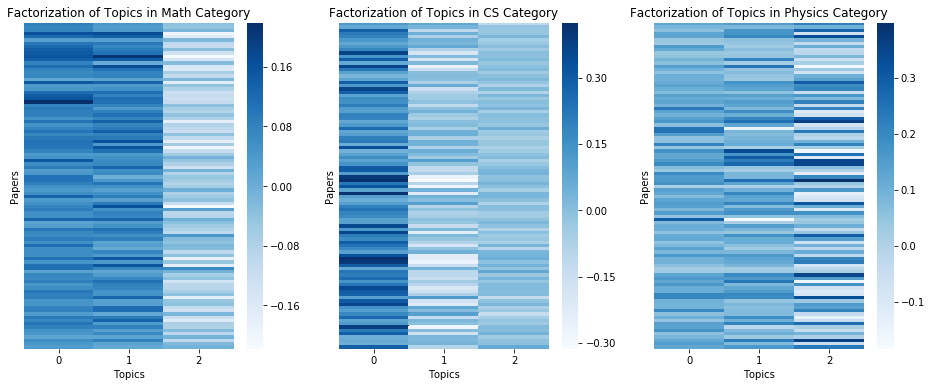

In [108]:
heat_graphs(W1)

These heatmaps already show some very interesting information. The papers from the math category contain a lot of topics 0 and 1. The papers from the computer science category contain mostly topic 0 which overlaps a little with the math category. The physics papers appear to a be a little more scattered across all three topics.

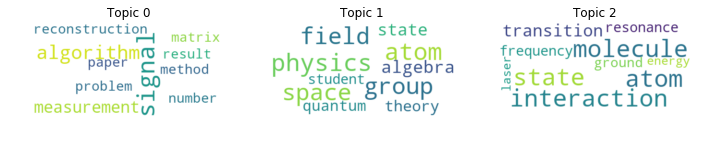

In [39]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, what I would expect to see is a number of words I would consider math focused in topics 0 and 1, words that are computer science focused in topic 0, and words that are physics focused scattered among the three. I find this very interesting as there are many words within each category that overlap and even with different meanings. For example, the word algorithm appears in topic 0 and is a very common term within the math and computer science fields but for different meanings. I would say the words above match my expectations. Although topic 2 feels a little more physics focused than the other two.

In [40]:
calc_coherence(H1)

0.5587163518047721

The model achieved a coherence score of approximately 55%. This is a decent score considering the dataset. Below I will be collecting the coherence scores using the model with 1 to 10 topics to be compared against the other models later on.

In [41]:
k_values = []
lsa_coherences = []
for k in range(1,11):
    lsa = TruncatedSVD(n_components=k)
    W1 = lsa.fit_transform(tfidf)
    H1 = lsa.components_
    k_values.append(k)
    lsa_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lsa_coherences[-1]))

K=01: Coherence=0.4724
K=02: Coherence=0.4254
K=03: Coherence=0.5587
K=04: Coherence=0.5314
K=05: Coherence=0.4564
K=06: Coherence=0.4419
K=07: Coherence=0.4442
K=08: Coherence=0.4410
K=09: Coherence=0.4460
K=10: Coherence=0.4428


### Latent Dirichlet Allocation ###

In [42]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 4916)


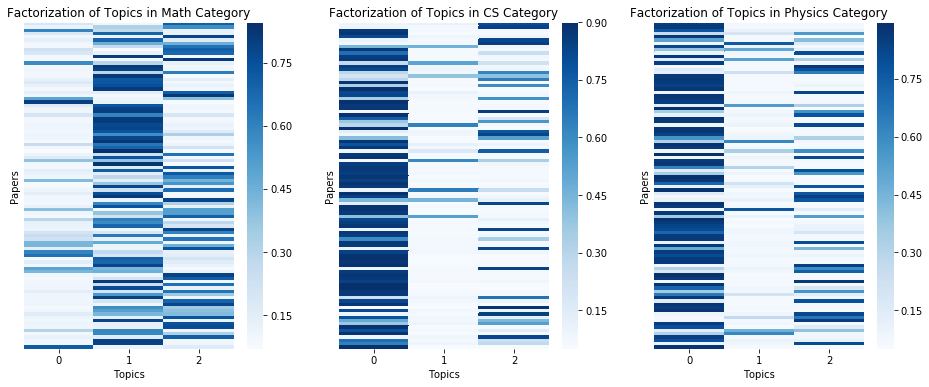

In [43]:
heat_graphs(W1)

These heatmaps are even more interesting in the fact that they seem to be even more clear cut versus the Latent Semantic Analysis model. The LSA model factors did still appear to favor certain topics over others but the factors were not as strong. 

The papers from the math category contain mostly topic 1. The papers from the computer science category very strongly contain topic 0. The physics papers also strongly contain topic 0 versus the LSA model where the physics papers seemed more scattered across all three.

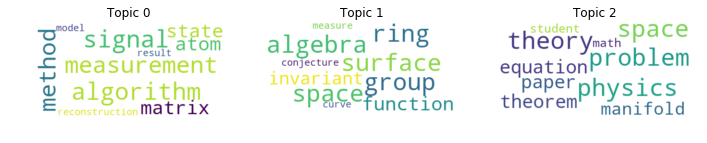

In [44]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, what I would expect to see is a number of words that are math focused in topic 1, words that are computer science focused in topic 0, and words that are physics focused also in topic 0. Which would leave a mix in topic 2. The words above match my expectations.

In [45]:
calc_coherence(H1)

0.4008759243942086

The model achieved a coherence score of approximately 40% which is not as good as the LSA model. However as we will later see the LDA model does better than the LSA model with more topics.

In [46]:
k_values = []
lda_coherences = []
for k in range(1,11):
    lda = LatentDirichletAllocation(n_components=k, random_state=0)
    W1 = lda.fit_transform(tfidf)
    H1 = lda.components_
    k_values.append(k)
    lda_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lda_coherences[-1]))

K=01: Coherence=0.2612
K=02: Coherence=0.4079
K=03: Coherence=0.4009
K=04: Coherence=0.4554
K=05: Coherence=0.4677
K=06: Coherence=0.5124
K=07: Coherence=0.4826
K=08: Coherence=0.4725
K=09: Coherence=0.4653
K=10: Coherence=0.5321


### Non-Negative Matrix Factorization ###

In [47]:
clf = NMF(n_components=3, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 4916)


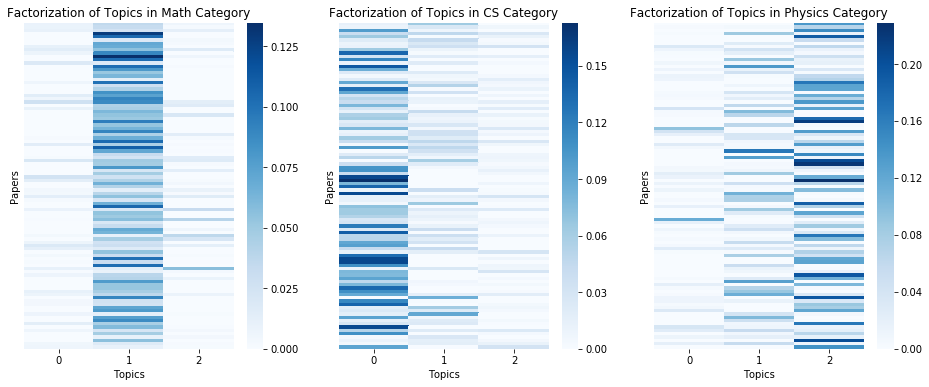

In [48]:
heat_graphs(W1)

Just looking at the heatmaps, the NMF model appears to be doing the best as it is clear cut like the LDA model but each paper category seems to have one topic and very minimal overlap. The papers from the math category contain a lot of topic 1. The papers from the computer science category contain a lot of topic 0. The physics papers contain mostly topic 2.

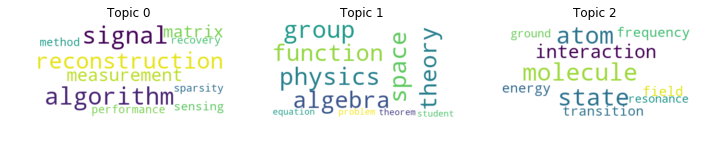

In [49]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, what I would expect to see is a number of words that are math focused in topic 1, words that are computer science focused in topic 0, and words that are physics focused in topic 2. These topics appear to show what I would expect except interestingly enough the word physics shows up in topic 1.

In [50]:
calc_coherence(H1)

0.6275692571907077

The coherence score for the NMF model is approximately 62% which is surprisingly good and as seen later on the NMF model consistently does better of the three models.

In [51]:
k_values = []
nmf_coherences = []
nmf_nouns = []
for k in range(1,11):
    clf = NMF(n_components=k, random_state=1)
    W1 = clf.fit_transform(tfidf)
    H1 = clf.components_
    k_values.append(k)
    nmf_coherences.append(calc_coherence(H1))
    nmf_nouns.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, nmf_coherences[-1]))

K=01: Coherence=0.4724
K=02: Coherence=0.5241
K=03: Coherence=0.6276
K=04: Coherence=0.6217
K=05: Coherence=0.5891
K=06: Coherence=0.5420
K=07: Coherence=0.5003
K=08: Coherence=0.5355
K=09: Coherence=0.5682
K=10: Coherence=0.5717


In [52]:
lsa_coherences = pd.DataFrame(lsa_coherences, columns={'Latent Semantic Analysis'})
lda_coherences = pd.DataFrame(lda_coherences, columns={'Latent Dirichlet Allocation'})
nmf_coherences = pd.DataFrame(nmf_coherences, columns={'Non-Negative Matrix Factorization'})

coherences = pd.concat([lsa_coherences, lda_coherences.reindex(lsa_coherences.index), nmf_coherences.reindex(lsa_coherences.index)], axis=1)

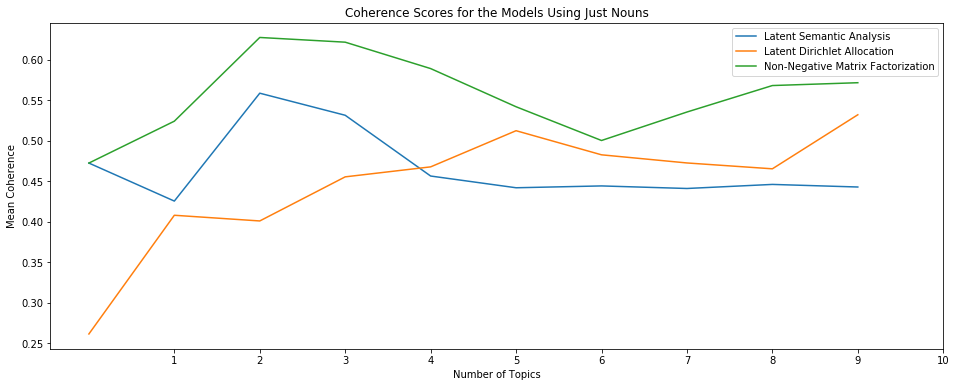

In [53]:
coherences.plot()
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.title('Coherence Scores for the Models Using Just Nouns');

As stated earlier, NMF consistently does the best. LDA does better than LSA with 4 or more topics. Both NMF and LSA have the highest coherence scores at 2 topics which is interesting and I think is a good example of the strong overlap between the three different paper categories.

### Topic Models Using Nouns + Adjectives ###

The topic models did a decent job using just nouns, however, let's see if the models do better with adjectives included as there are some adjectives that are often used within each field for example sparse or atomic.

In [54]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df2['nouns_adjs'])
vectors.shape

(3000, 6799)

In this matrix, using the nouns and the adjectives gives me 6799 features.

In [55]:
vocab = np.array(vectorizer.get_feature_names())

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=1)
tfidf = tfidf_vectorizer.fit_transform(df2['nouns_adjs'])
tfidf.shape

(3000, 6799)

### Latent Semantic Analysis ###

In [57]:
lsa = TruncatedSVD(n_components=3)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 6799)


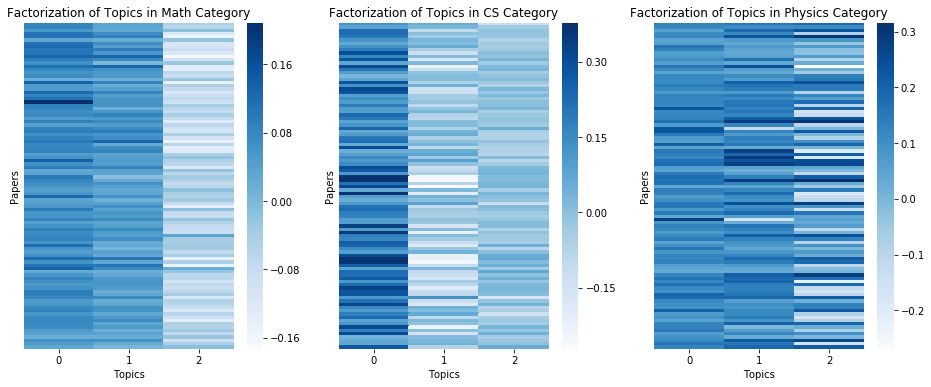

In [58]:
heat_graphs(W1)

Once again with the LSA model, the papers overlap quite a bit over the three topics unlike LDA and NMF. However, the math papers appear to contain a good amount of topics 0 and 1 and the computer science papers contain a lot of topic 0.

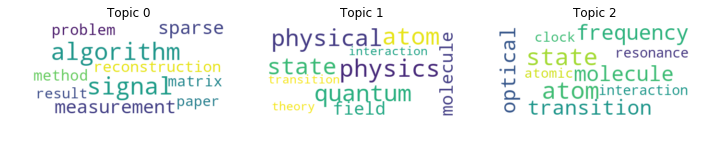

In [59]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

I expect to see a number of math focused words in topics 0 and 1, computer science focused words in topic 0, and physics focused words among the three. As was the case with the LSA model using just nouns, the word algorithm appears in topic 0 and is a very common term within the math and computer science fields but for different meanings. I would say the words above match my expectations. Although topic 1 feels more physics focused than math.

In [60]:
calc_coherence(H1)

0.6832721560909009

The coherence score is approximately 68% which is much better than the coherence score for the LSA model using just nouns.

In [61]:
k_values = []
lsa_coherences = []
for k in range(1,11):
    lsa = TruncatedSVD(n_components=k)
    W1 = lsa.fit_transform(tfidf)
    H1 = lsa.components_
    k_values.append(k)
    lsa_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lsa_coherences[-1]))

K=01: Coherence=0.5376
K=02: Coherence=0.6036
K=03: Coherence=0.6833
K=04: Coherence=0.6054
K=05: Coherence=0.5398
K=06: Coherence=0.4941
K=07: Coherence=0.5198
K=08: Coherence=0.5537
K=09: Coherence=0.4781
K=10: Coherence=0.5092


### Latent Dirichlet Allocation ###

In [62]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 6799)


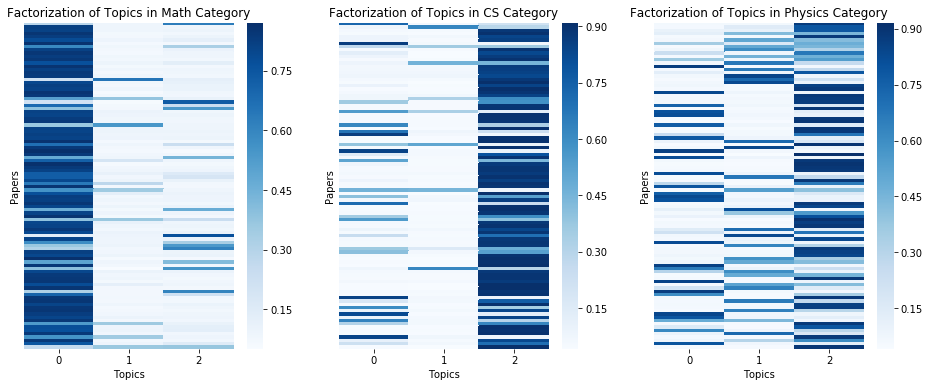

In [63]:
heat_graphs(W1)

These heatmaps are pretty consistent with the heatmaps seen for the LDA model with just nouns. The math papers contain mostly topic 0, the computer science papers contain mostly topic 2, and the physics papers are spread out.

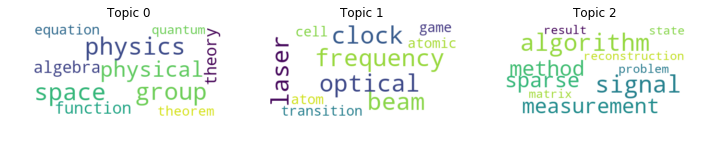

In [64]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

I expect to see math focused words in topic 0, computer science focused words in topic 2, and physics focused words scattered among the three. As with the LSA model using nouns and adjectives, it's interesting to see physics and physical within topic 0. Otherwise the words above match my expectations.

In [65]:
calc_coherence(H1)

0.5802007625976487

The coherence score is approximately 58%.

In [66]:
k_values = []
lda_coherences = []
for k in range(1,11):
    lda = LatentDirichletAllocation(n_components=k, random_state=0)
    W1 = lda.fit_transform(tfidf)
    H1 = lda.components_
    k_values.append(k)
    lda_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lda_coherences[-1]))

K=01: Coherence=0.2612
K=02: Coherence=0.5300
K=03: Coherence=0.5802
K=04: Coherence=0.5479
K=05: Coherence=0.5496
K=06: Coherence=0.3934
K=07: Coherence=0.3714
K=08: Coherence=0.4819
K=09: Coherence=0.5555
K=10: Coherence=0.5258


### Non-Negative Matrix Factorization ###

In [67]:
clf = NMF(n_components=3, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 6799)


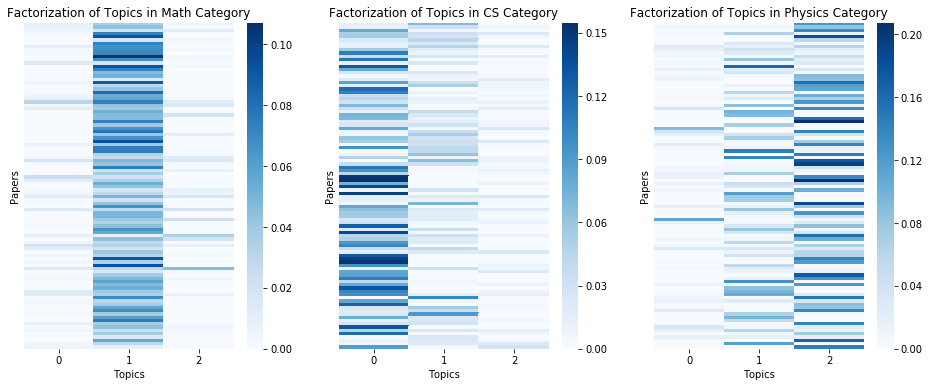

In [68]:
heat_graphs(W1)

Similarly as before, the NMF model appears to be doing the best as it is clear cut like the LDA model but each paper category seems to have one topic and very minimal overlap. The papers from the math category contain a lot of topic 1. The papers from the computer science category contain a lot of topic 0. The physics papers contain moreso topic 2.

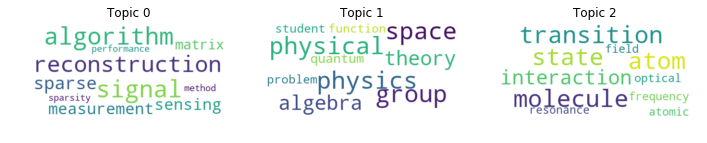

In [69]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

I expect to see is a number of words that are math focused in topic 1, words that are computer science focused in topic 0, and words that are physics focused in topic 2. These topics appear to show what I would expect except once again physics and physical are appearing in topic 1 where I expect more math focused words.

In [70]:
calc_coherence(H1)

0.6447396859875599

The coherence score is approximately 64%.

In [71]:
k_values = []
nmf_coherences = []
nmf_nouns_adjs = []
for k in range(1,11):
    clf = NMF(n_components=k, random_state=1)
    W1 = clf.fit_transform(tfidf)
    H1 = clf.components_
    k_values.append(k)
    nmf_coherences.append(calc_coherence(H1))
    nmf_nouns_adjs.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, nmf_coherences[-1]))

K=01: Coherence=0.5376
K=02: Coherence=0.5788
K=03: Coherence=0.6447
K=04: Coherence=0.6526
K=05: Coherence=0.6376
K=06: Coherence=0.6308
K=07: Coherence=0.6599
K=08: Coherence=0.6922
K=09: Coherence=0.6772
K=10: Coherence=0.6875


In [72]:
lsa_coherences = pd.DataFrame(lsa_coherences, columns={'Latent Semantic Analysis'})
lda_coherences = pd.DataFrame(lda_coherences, columns={'Latent Dirichlet Allocation'})
nmf_coherences = pd.DataFrame(nmf_coherences, columns={'Non-Negative Matrix Factorization'})

coherences = pd.concat([lsa_coherences, lda_coherences.reindex(lsa_coherences.index), nmf_coherences.reindex(lsa_coherences.index)], axis=1)

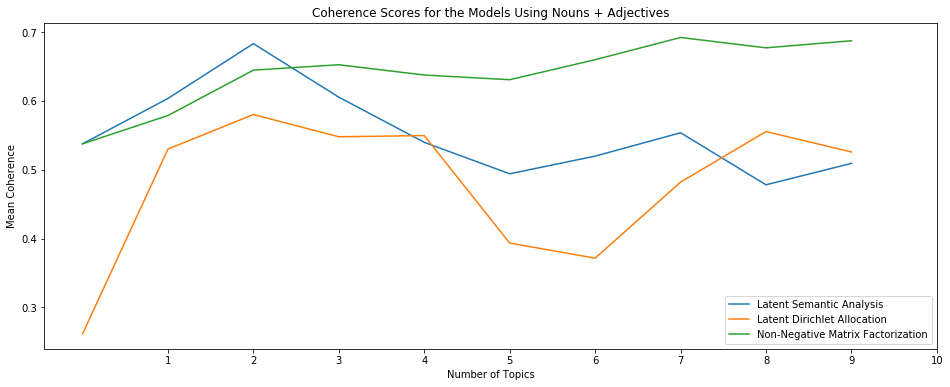

In [73]:
coherences.plot()
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.title('Coherence Scores for the Models Using Nouns + Adjectives');

Overall, NMF consistently does the best and it's scores appear to increase with the number of topics. NMF's coherence score almost reaches 70% at 7 topics which is really good.

### Topic Models Using Nouns + Adjectives + Proper Nouns ###

Including adjectives in the models showed some improvement. But now let's see how the models do if we add proper nouns as there are names discussed within the papers that could help the models separate the papers into different topics.

In [74]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df2['nouns_adjs_prpns'])
vectors.shape

(3000, 10508)

In this matrix, using the nouns, the adjectives, and the proper nouns gives me 10,508 features.

In [75]:
vocab = np.array(vectorizer.get_feature_names())

In [76]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=1)
tfidf = tfidf_vectorizer.fit_transform(df2['nouns_adjs_prpns'])
tfidf.shape

(3000, 10508)

### Latent Semantic Analysis ###

In [77]:
lsa = TruncatedSVD(n_components=3)
W1 = lsa.fit_transform(tfidf)
H1 = lsa.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10508)


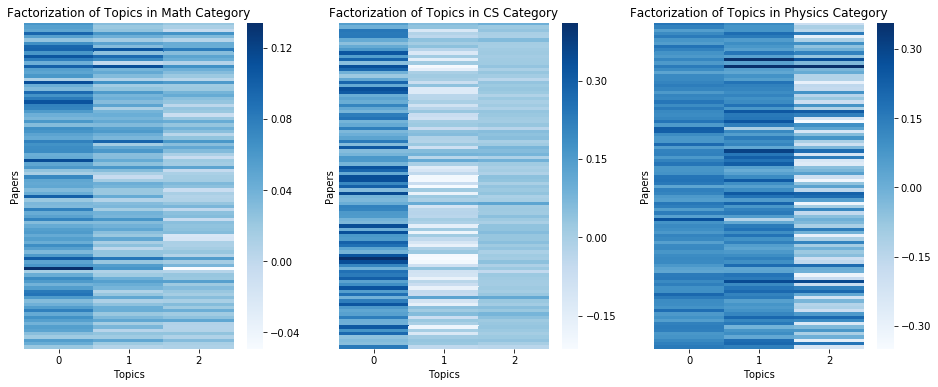

In [78]:
heat_graphs(W1)

Unlike the previous LSA models, the topics seem a little more defined within each paper category especially the physics papers.

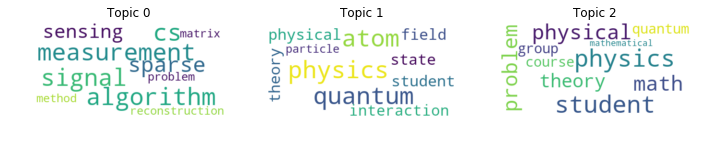

In [79]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, I expect to see math and computer science focused words in topic 0 and physics focused words in topics 0 and 1. Topic 2 appears to have quite a mix of math and physics, but otherwise the topics look close to what I expected.

In [80]:
calc_coherence(H1)

0.518905709870212

The coherence score is approximately 52%.

In [81]:
k_values = []
lsa_coherences = []
for k in range(1,11):
    lsa = TruncatedSVD(n_components=k)
    W1 = lsa.fit_transform(tfidf)
    H1 = lsa.components_
    k_values.append(k)
    lsa_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lsa_coherences[-1]))

K=01: Coherence=0.6130
K=02: Coherence=0.5694
K=03: Coherence=0.5189
K=04: Coherence=0.5379
K=05: Coherence=0.6117
K=06: Coherence=0.6165
K=07: Coherence=0.5748
K=08: Coherence=0.5388
K=09: Coherence=0.5784
K=10: Coherence=0.5587


### Latent Dirichlet Allocation ###

In [82]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)

W1 = lda.fit_transform(tfidf)
H1 = lda.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10508)


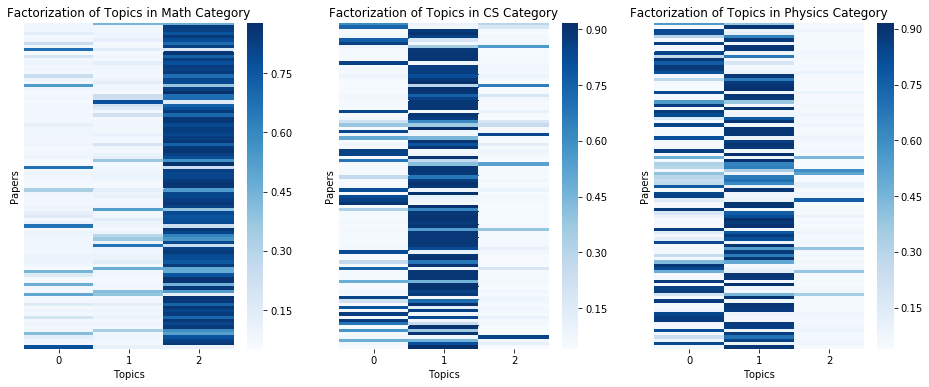

In [83]:
heat_graphs(W1)

Similarly to the LSA model using nouns, adjectives, and proper nouns, the physics papers appear to be more defined. This is very interesting and may suggest that the physics papers contain more proper nouns than the other two categories.

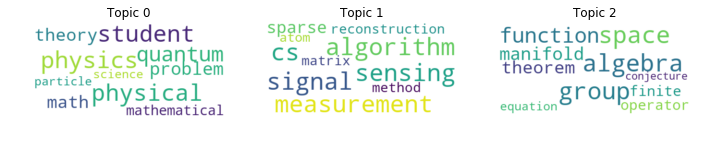

In [84]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, I expect to see math focused words in topic 2, computer science focused words in topic 1, and physics focused words in topics 0 and 1. The topics appear to show what I would expect.

In [85]:
calc_coherence(H1)

0.5168349467582352

The coherence score is approximately 52%.

In [86]:
k_values = []
lda_coherences = []
for k in range(1,11):
    lda = LatentDirichletAllocation(n_components=k, random_state=0)
    W1 = lda.fit_transform(tfidf)
    H1 = lda.components_
    k_values.append(k)
    lda_coherences.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, lda_coherences[-1]))

K=01: Coherence=0.3640
K=02: Coherence=0.4562
K=03: Coherence=0.5168
K=04: Coherence=0.4049
K=05: Coherence=0.5200
K=06: Coherence=0.4371
K=07: Coherence=0.5429
K=08: Coherence=0.4543
K=09: Coherence=0.5016
K=10: Coherence=0.4712


### Non-Negative Matrix Factorization ###

In [87]:
clf = NMF(n_components=3, random_state=1)

W1 = clf.fit_transform(tfidf)
H1 = clf.components_

print(W1.shape)
print(H1.shape)

(3000, 3)
(3, 10508)


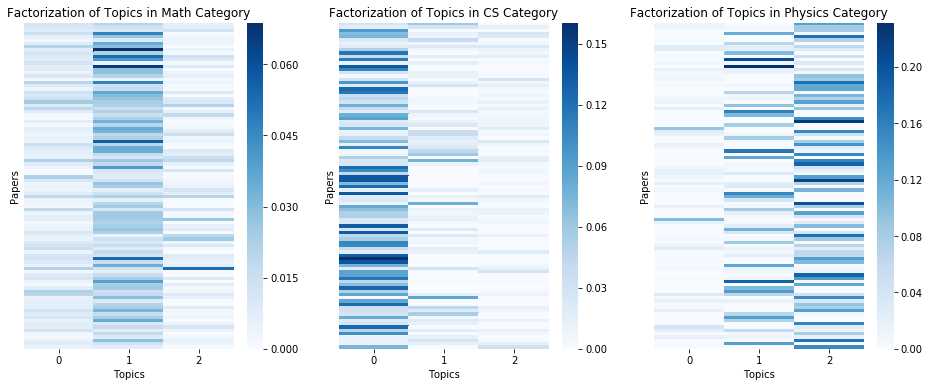

In [88]:
heat_graphs(W1)

These heatmaps appear to be slightly less defined in comparison to the other NMF models and the models including the proper nouns.

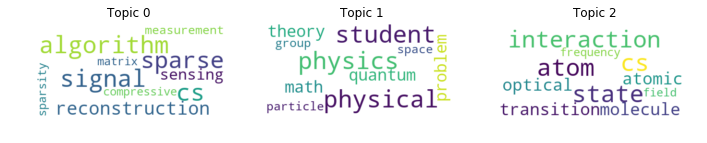

In [89]:
text = show_topics(H1)
text = [" ".join(word) for word in text]
print_wordclouds(text)

Based on the heatmaps, I expect to see math focused words in topic 1, computer science focused words in topic 0, and physics focused words in topic 2. The words above match my expectations.

In [90]:
calc_coherence(H1)

0.6430098920510047

The coherence score is approximately 64%.

In [91]:
k_values = []
nmf_coherences = []
nmf_nouns_adjs_prpns = []
for k in range(1,11):
    clf = NMF(n_components=k, random_state=1)
    W1 = clf.fit_transform(tfidf)
    H1 = clf.components_
    k_values.append(k)
    nmf_coherences.append(calc_coherence(H1))
    nmf_nouns_adjs_prpns.append(calc_coherence(H1))
    print("K=%02d: Coherence=%.4f" % (k, nmf_coherences[-1]))

K=01: Coherence=0.6130
K=02: Coherence=0.6305
K=03: Coherence=0.6430
K=04: Coherence=0.6464
K=05: Coherence=0.7006
K=06: Coherence=0.7240
K=07: Coherence=0.7128
K=08: Coherence=0.7007
K=09: Coherence=0.7223
K=10: Coherence=0.6944


In [92]:
lsa_coherences = pd.DataFrame(lsa_coherences, columns={'Latent Semantic Analysis'})
lda_coherences = pd.DataFrame(lda_coherences, columns={'Latent Dirichlet Allocation'})
nmf_coherences = pd.DataFrame(nmf_coherences, columns={'Non-Negative Matrix Factorization'})

coherences = pd.concat([lsa_coherences, lda_coherences.reindex(lsa_coherences.index), nmf_coherences.reindex(lsa_coherences.index)], axis=1)

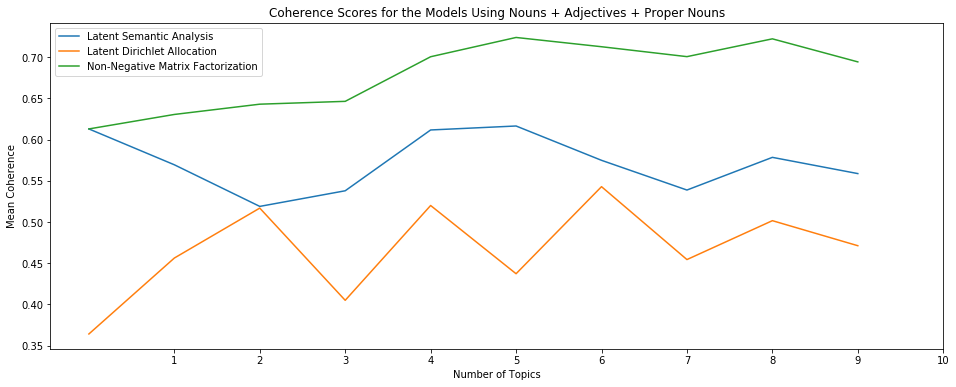

In [93]:
coherences.plot()
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.title('Coherence Scores for the Models Using Nouns + Adjectives + Proper Nouns');

Once again overall, NMF consistently does the best. NMF's coherence scores are over 70% with 4 or more topics which is surprisingly very good.

As NMF was consistently the best model across all three different groups of words, below I will use the NMF coherence scores to see the difference in using the different groups of words.

In [94]:
nmf_nouns = pd.DataFrame(nmf_nouns, columns={'Just Nouns'})
nmf_nouns_adjs = pd.DataFrame(nmf_nouns_adjs, columns={'Nouns + Adjectives'})
nmf_nouns_adjs_prpns = pd.DataFrame(nmf_nouns_adjs_prpns, columns={'Nouns + Adjectives + Proper Nouns'})

coherences = pd.concat([nmf_nouns, nmf_nouns_adjs.reindex(nmf_nouns.index),
                        nmf_nouns_adjs_prpns.reindex(nmf_nouns.index)], axis=1)

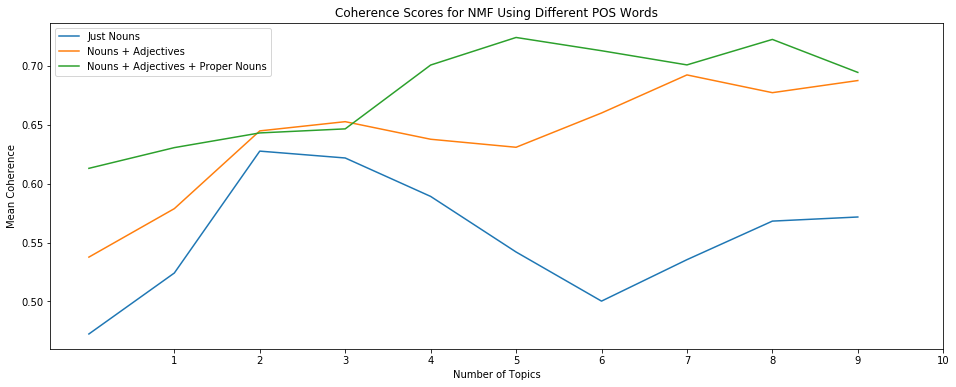

In [95]:
coherences.plot()
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
plt.title('Coherence Scores for NMF Using Different POS Words');

### Conclusion ###

In conclusion, throughout all three different groups of POS words, the Latent Semantic Analysis model tended to have a fair amount of overlap among the topics in each of the three paper categories. It was interesting to see some words such as algorithm appear in topics that were both math and computer science focused as this word is commonly seen in both fields however in different contexts. The coherence scores for the LSA model were consistently decent but were not the best. Unlike the LSA models, the Latent Dirichlet Allocation and Non-negative Matrix Factorization models appeared to be more clear cut in the sense that the factors were a lot stronger causing each paper to fall moreso into one specific topic. Although the LDA models had stronger factors, within each paper category there was still some overlap among the 3 topics. The coherence scores for the LDA models were also consistently decent but still not best. The scores of the LDA model were almost on par with the LSA model scores. Lastly, the NMF models in general did the best of the three topic models. The factors were stronger than the LSA models' and each of the paper categories tended to favor one specific topic with minimal overlap unlike the LDA models. The coherence scores for the NMF models were consisently suprisingly good. Even as different groups of POS words were added the model did increasingly better getting up to over 70%. After testing the models on different groups of POS words, I found using the nouns, adjectives, and proper nouns in the topic models worked the best. Although there was not a huge difference in adding more POS words, the coherence scores did increase. Overall, there was some overlap in words used in the different topics from each of the paper categories but for the most part they appeared to have a focus on a specific category and the models were able to perform decently well.

#### Next Steps ####

As my next steps, I plan to slightly modify my topic modeling method so it can be used by users ongoing as a way to see patterns in the topics discussed throughout the papers. For example, they can discover what topics were most popular during certain periods of time.